In [1]:
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
from hydrocivil.watersheds import RiverBasin

In [2]:
# Load basins
basins = gpd.read_file(r'data\basins.shp')

# Load domain-wide data
streams = gpd.read_file(r'data\streams.shp').set_crs(basins.crs)
dem = rxr.open_rasterio(r'data\ESA_COP30_UTM19S.tif', masked=True).squeeze()

In [3]:
# Create for each basin a DEM and river network
basins_split = []
rivers = []
dems = []
for idx, row in basins.iterrows():
    basin = gpd.GeoDataFrame(row).T.set_geometry('geometry').set_crs(basins.crs)
    basins_split.append(basin)
    rivers.append(streams.clip(row.geometry))
    dems.append(dem.rio.clip(gpd.GeoSeries(row.geometry)))

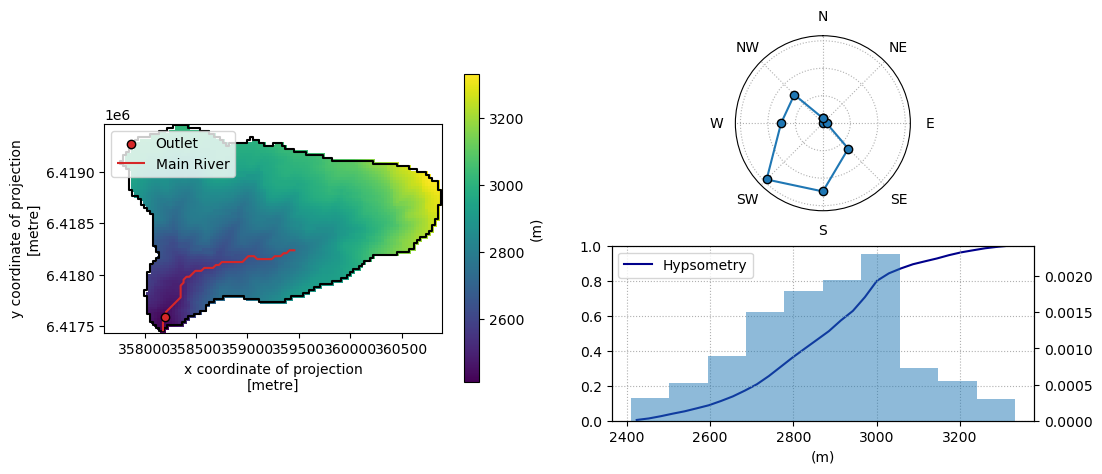

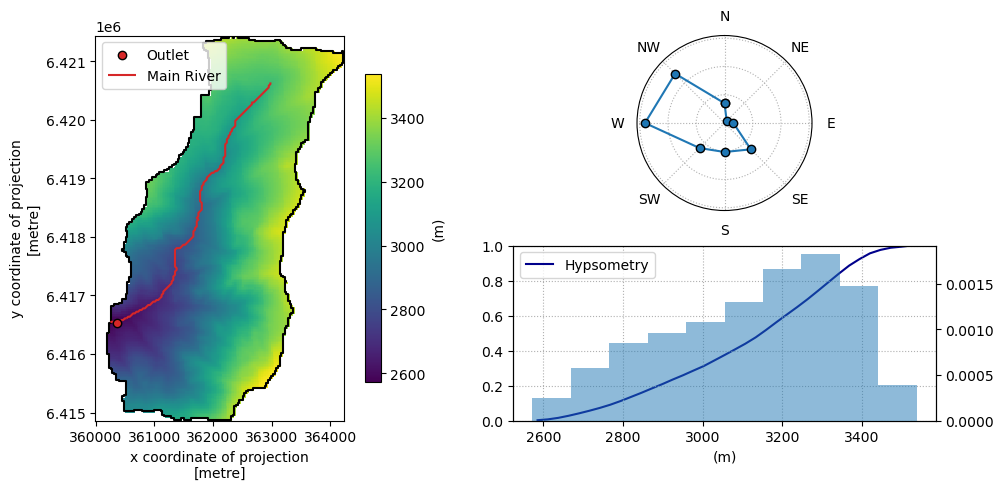

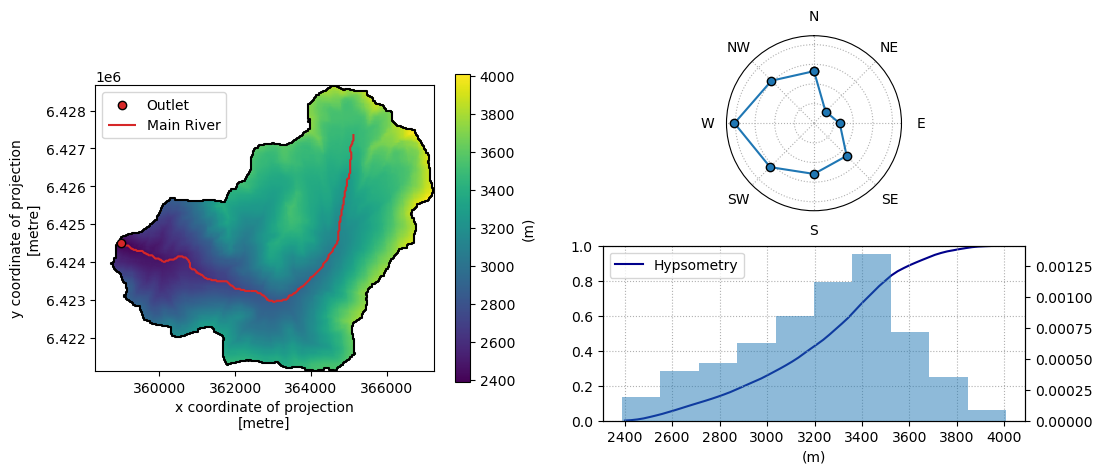

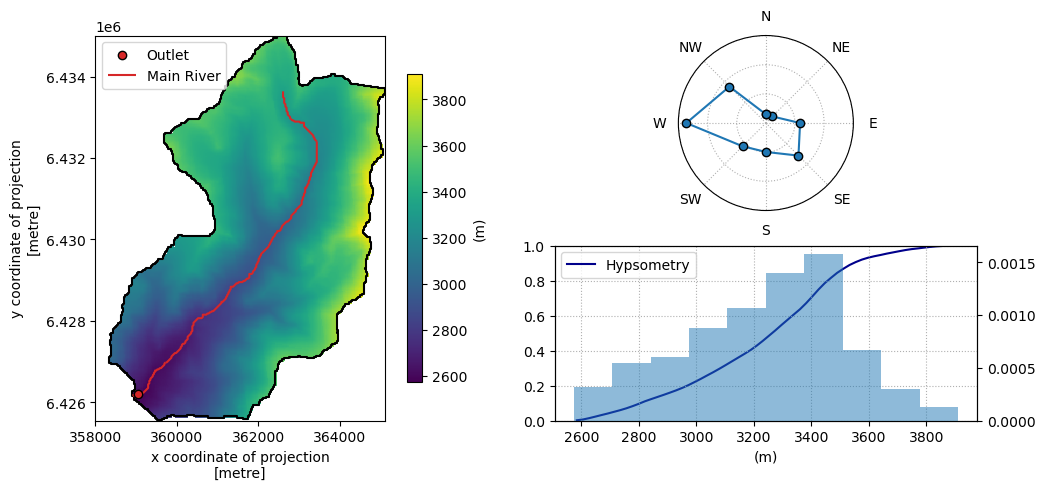

In [4]:
# Create hydrocivil watershed objects
geoparams = []
for name, basin, river, dem in zip(basins['Names'],basins_split, rivers, dems):
    wshed = RiverBasin(name, basin, river, dem)
    wshed = wshed.compute_params()
    wshed.plot() # Plot each basin
    
    geoparams.append(wshed.params)
geoparams = pd.concat(geoparams, axis=1)

In [5]:
geoparams

,B0,B1,B2,B3
outlet_x,358202.942,360361.844,358996.175,359044.574
outlet_y,6417588.828,6416531.771,6424498.707,6426209.547
centroid_x,359171.784484,362090.512559,363371.702859,361945.514989
centroid_y,6418545.171178,6417959.966678,6424585.219029,6429956.49669
area,3.837103,15.505977,36.652495,38.704937
perim,10.857664,23.315404,34.344504,37.544658
out2centroidlen,1.361341,2.242329,4.376383,4.73868
hmin,2409.875732,2572.600098,2387.472656,2573.06958
hmax,3331.547363,3537.436035,4007.855957,3910.382324
hmean,2877.885986,3124.145508,3228.563232,3235.495605
